In [54]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
print(cv2.__version__)

4.8.1


# Main

(1080, 1920, 3)


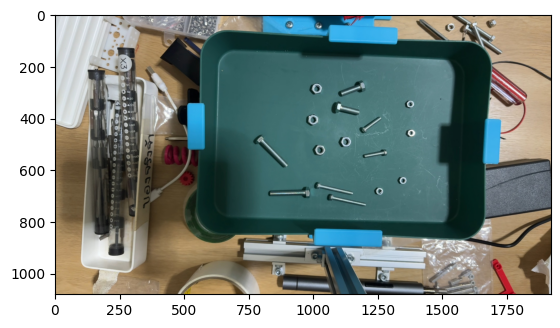

In [55]:
img = cv2.imread('src/image_37.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

(565, 800, 3)


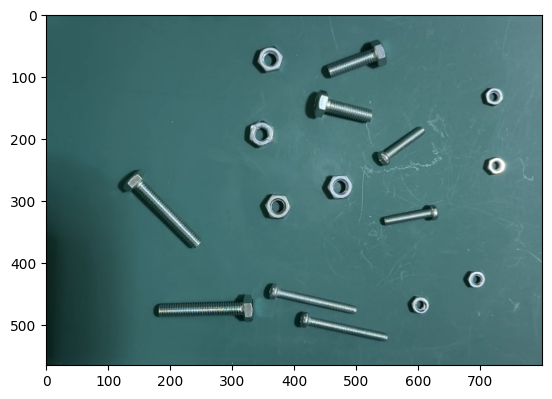

In [56]:
# determine box
img_resize = img[215:780, 650:1450]
print(img_resize.shape)
plt.imshow(img_resize)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        3.0000e+00, 4.0000e+00, 3.0000e+00, 6.0000e+00, 1.4000e+01,
        9.0000e+00, 1.3000e+01, 1.3000e+01, 2.3000e+01, 3.5000e+01,
        4.9000e+01, 7.1000e+01, 8.7000e+01, 1.0400e+02, 1.3900e+02,
        1.5600e+02, 1.6600e+02, 2.1400e+02, 2.1400e+02, 2.8700e+02,
        3.2200e+02, 3.6200e+02, 8.3500e+02, 1.0020e+03, 6.8900e+02,
        8.5800e+02, 9.0900e+02, 7.0200e+02, 5.6800e+02, 5.5500e+02,
        5.0400e+02, 4.9200e+02, 5.4300e+02, 4.9900e+02, 5.7500e+02,
        4.1600e+02, 4.9000e+02, 6.2100e+02, 6.7900e+02, 8.2500e+02,
        6.2700e+02, 1.0180e+03, 9.9000e+02, 7.9500e+02, 9.7800e+02,
        1.2370e+03, 1.1560e+03, 1.1680e+03, 1.2870e+03, 1.1480e+03,
        9.7300e+02, 7.0400e+02, 9.6400e+02, 1.1730e+03, 1.2020e+03,
        1.2420e+03, 1.0850e+03, 7.8500e+02, 1.4190e+03, 1.7320e+03,
        1.3160e+03, 1.2370e+03, 1.4290e+03, 1.6180e+03, 1.6360e+03,
        1.4020e+03, 1.3490e+03, 1.0930e+03, 9.99

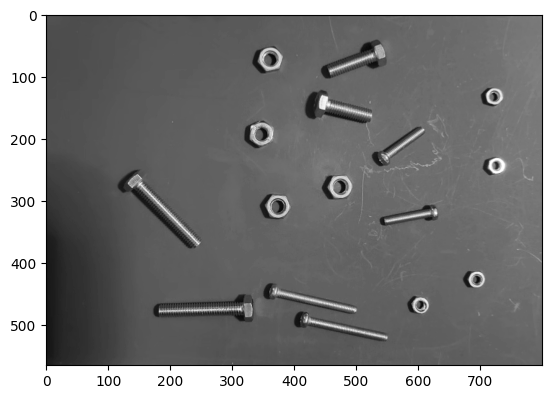

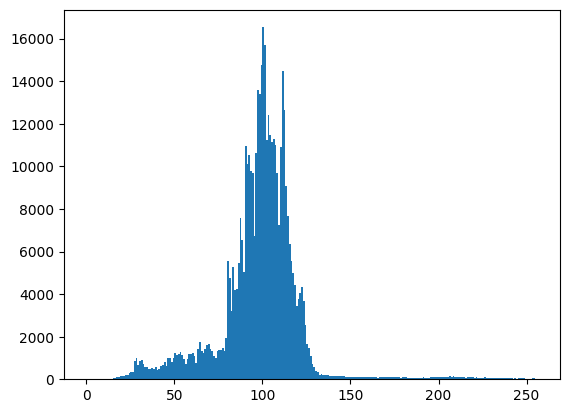

In [57]:
img_resize = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)
plt.imshow(img_resize, cmap='gray')
plt.figure()
plt.hist(img_resize.ravel(), 256, [0, 256])

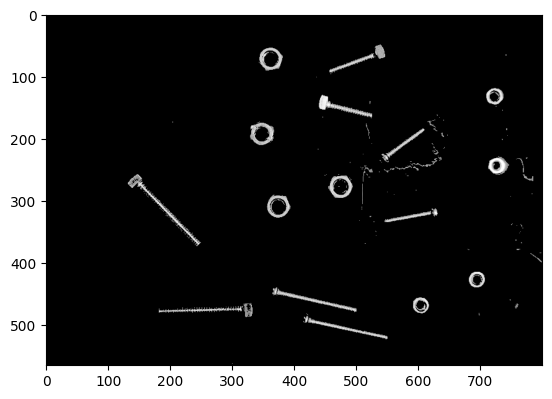

In [58]:
# threshold
_, img_tres = cv2.threshold(img_resize, 135, 255, cv2.THRESH_TOZERO)
plt.imshow(img_tres, cmap='gray')

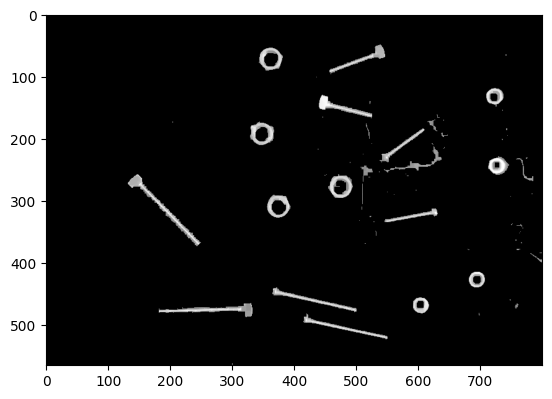

In [59]:
# closing
ksize = 7
kernel = np.ones((ksize, ksize), np.uint8)
closing = cv2.morphologyEx(img_tres,
                           cv2.MORPH_CLOSE,
                           kernel,
                           iterations=1)
plt.imshow(closing, cmap='gray')

(565, 800, 3)
16
area0: 599.0
rect0: ((483.43280029296875, 502.38397216796875), (138.29566955566406, 14.517594337463379), 11.560131072998047)
area1: 956.0
rect1: ((257.2560729980469, 480.2107849121094), (21.534543991088867, 150.20901489257812), 86.52008056640625)
area2: 493.5
rect2: ((604.5, 468.5), (25.0, 25.0), 90.0)
area3: 685.5
rect3: ((433.16156005859375, 459.22198486328125), (138.5208282470703, 12.766029357910156), 11.733084678649902)
area4: 492.5
rect4: ((694.5, 427.0), (24.0, 25.0), 90.0)
area5: 404.5
rect5: ((588.0633544921875, 323.5553283691406), (12.407754898071289, 86.08578491210938), 82.77568817138672)
area6: 1012.0
rect6: ((375.04412841796875, 309.42645263671875), (37.8880729675293, 35.66387176513672), 4.39870548248291)
area7: 1059.5
rect7: ((474.60003662109375, 277.300048828125), (36.224300384521484, 39.35479736328125), 26.56505012512207)
area8: 1228.0
rect8: ((191.75001525878906, 317.2500305175781), (151.3208465576172, 21.92030906677246), 45.0)
area9: 657.5
rect9: ((728

/var/folders/xk/wz6j5qw9623dnjz28815491m0000gn/T/ipykernel_86571/2716824436.py:29: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


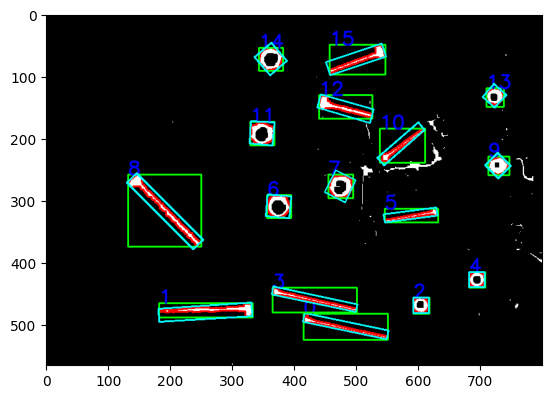

In [100]:
_,bw = cv2.threshold(closing, 0, 255, cv2.THRESH_BINARY)
mask = cv2.merge([bw, bw, bw])
# plt.imshow(mask)
print(mask.shape)

contours, _ = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = [i for i in contours if cv2.contourArea(i) >= 400]

# draw contours
print(len(contours))
for i in range(len(contours)):
    a = cv2.contourArea(contours[i])
    print(f'area{i}:',a)
    cv2.drawContours(mask, contours, i, (255, 0, 0), 2)

    x, y, w, h = cv2.boundingRect(contours[i])
    cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 255, 0), 2)
    bound = cv2.boundingRect(contours[i])

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(mask, str(i), (x, y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # min area rect
    rect = cv2.minAreaRect(contours[i]) # (cen(x, y), (w, h), angle)
    # angle -> gripper head angle
    print(f'rect{i}:',rect)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(mask, [box], 0, (0, 255, 255), 2)

plt.figure()
plt.imshow(mask)

In [105]:
# swap width and height in rect
for i in range(len(contours)):
    rect = cv2.minAreaRect(contours[i])
    if rect[1][0] > rect[1][1]:
        rect = (rect[0], (rect[1][1], rect[1][0]), rect[2])
    print(f'rect{i}:',rect)


rect0: ((483.43280029296875, 502.38397216796875), (14.517594337463379, 138.29566955566406), 11.560131072998047)
rect1: ((257.2560729980469, 480.2107849121094), (21.534543991088867, 150.20901489257812), 86.52008056640625)
rect2: ((604.5, 468.5), (25.0, 25.0), 90.0)
rect3: ((433.16156005859375, 459.22198486328125), (12.766029357910156, 138.5208282470703), 11.733084678649902)
rect4: ((694.5, 427.0), (24.0, 25.0), 90.0)
rect5: ((588.0633544921875, 323.5553283691406), (12.407754898071289, 86.08578491210938), 82.77568817138672)
rect6: ((375.04412841796875, 309.42645263671875), (35.66387176513672, 37.8880729675293), 4.39870548248291)
rect7: ((474.60003662109375, 277.300048828125), (36.224300384521484, 39.35479736328125), 26.56505012512207)
rect8: ((191.75001525878906, 317.2500305175781), (21.92030906677246, 151.3208465576172), 45.0)
rect9: ((728.5000610351562, 243.50003051757812), (28.284271240234375, 29.698484420776367), 45.0)
rect10: ((572.5464477539062, 208.82992553710938), (15.71468162536

In [119]:
# classify
# rect = (cen(x, y), (w, h), angle, (type,length))
def NutScrew(rect):
    # for i in range(len(contours)):
    #     rect = cv2.minAreaRect(contours[i])
    #     if rect[1][0] > rect[1][1]:
    #         rect = (rect[0], (rect[1][1], rect[1][0]), rect[2])
    w, h = rect[1]
    dx = abs(w-h)
    print('dx:',dx)
    err = 5
    if dx < err:
        # rect = (rect[0], rect[1], rect[2], ('nut',None, None))
        # rect[3][0] = 'nut'

        # check nut type
        m4nut = 25
        m6nut = 35
        if w < m4nut+err and w > m4nut-err:
            # rect[3][1] = 'm4'
            # rect = (rect[0], rect[1], rect[2], ('nut', 'm4', None))
            t = 'nut'
            s = 'm4'
            l = 'none'
            return t, s, l
        elif w < m6nut+err and w > m6nut-err:
            # rect[3][1] = 'm6'
            # rect = (rect[0], rect[1], rect[2], ('nut', 'm6', None))
            t = 'nut'
            s = 'm6'
            l = 'none'
            return t, s, l
    elif dx > err:
        # rect = (rect[0], rect[1], rect[2], ('screw', None))
        # rect[3][0] = 'screw'

        # check screw type
        m4w = 10
        m6w = 20
        werr = 5
        l18 = 85
        l35 = 145
        lerr = 20

        if w < m4w+werr and w > m4w-werr:
            if h < l18+lerr and h > l18-lerr:
                # rect = (rect[0], rect[1], rect[2], ('screw', 'm4', '18'))
                t = 'screw'
                s = 'm4'
                l = '18'
                return t, s, l
            elif h < l35+lerr and h > l35-lerr:
                # rect = (rect[0], rect[1], rect[2], ('screw', 'm4', '35'))
                t = 'screw'
                s = 'm4'
                l = '35'
                return t, s, l
        elif w < m6w+werr and w > m6w-werr:
            # rect = (rect[0], rect[1], rect[2], ('screw', 'm6', None))
            if h < l18+lerr and h > l18-lerr:
                # rect = (rect[0], rect[1], rect[2], ('screw', 'm6', '18'))
                t = 'screw'
                s = 'm6'
                l = '18'
                return t, s, l
            elif h < l35+lerr and h > l35-lerr:
                # rect = (rect[0], rect[1], rect[2], ('screw', 'm6', '35'))
                t = 'screw'
                s = 'm6'
                l = '35'
                return t, s, l
        # print(f'rect{i}:',rect)
        
for i in range(len(contours)):
    rect = cv2.minAreaRect(contours[i])
    if rect[1][0] > rect[1][1]:
        rect = (rect[0], (rect[1][1], rect[1][0]), rect[2])
    print(f'rect{i}:',rect)
    t, s, l = NutScrew(rect)
    print(f'type{i}:',t)
    print(f'size{i}:',s)
    print(f'length{i}:',l)



rect0: ((483.43280029296875, 502.38397216796875), (14.517594337463379, 138.29566955566406), 11.560131072998047)
dx: 123.77807521820068
type0: screw
size0: m4
length0: 35
rect1: ((257.2560729980469, 480.2107849121094), (21.534543991088867, 150.20901489257812), 86.52008056640625)
dx: 128.67447090148926
type1: screw
size1: m6
length1: 35
rect2: ((604.5, 468.5), (25.0, 25.0), 90.0)
dx: 0.0
type2: nut
size2: m4
length2: none
rect3: ((433.16156005859375, 459.22198486328125), (12.766029357910156, 138.5208282470703), 11.733084678649902)
dx: 125.75479888916016
type3: screw
size3: m4
length3: 35
rect4: ((694.5, 427.0), (24.0, 25.0), 90.0)
dx: 1.0
type4: nut
size4: m4
length4: none
rect5: ((588.0633544921875, 323.5553283691406), (12.407754898071289, 86.08578491210938), 82.77568817138672)
dx: 73.67803001403809
type5: screw
size5: m4
length5: 18
rect6: ((375.04412841796875, 309.42645263671875), (35.66387176513672, 37.8880729675293), 4.39870548248291)
dx: 2.224201202392578
type6: nut
size6: m6
lengt

dx: 123.77807521820068
dx: 128.67447090148926
dx: 0.0
dx: 125.75479888916016
dx: 1.0
dx: 73.67803001403809
dx: 2.224201202392578
dx: 3.1304969787597656
dx: 129.40053749084473
dx: 1.4142131805419922
dx: 70.76496315002441
dx: 0.569976806640625
dx: 65.79570198059082
dx: 1.7489471435546875
dx: 2.8773841857910156
dx: 72.73239135742188


/var/folders/xk/wz6j5qw9623dnjz28815491m0000gn/T/ipykernel_86571/1273938298.py:8: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


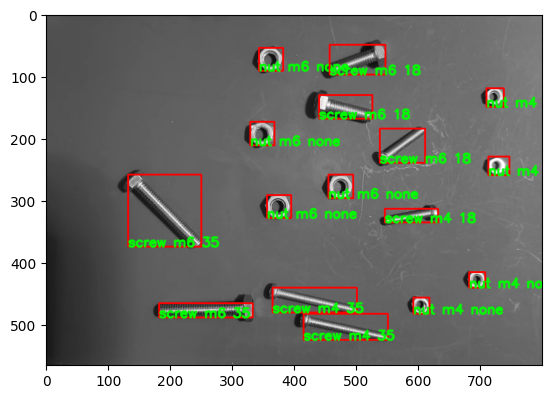

In [130]:
img2 = cv2.merge([img_resize, img_resize, img_resize])
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)

    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    if rect[1][0] > rect[1][1]:
        rect = (rect[0], (rect[1][1], rect[1][0]), rect[2])
    result = NutScrew(rect)
    if result is not None:
        t, s, l = result
        text = f'{t} {s} {l}'
    else:
        text = 'None'
    cv2.putText(img2, text, (x, y+h), font, 0.7, (0,255,0), 2, cv2.LINE_AA)

plt.imshow(img2, cmap='gray')

### To Do
0. looping until 0 unknown - oscillated tray
1. watershed lines - identify overlapped object
2. overlap check